In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

C:\Users\jayan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jayan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [43]:
df = pd.read_csv('Narcotics_Dataset.csv', encoding='unicode_escape')

In [44]:
df

,SL No.,DATE OF SEIZURE,SEIZING AGENCY,QUANTITY AND DRUG SEIZED (IN KGS.),PLACE OF ORIGIN,INTENDED DESTINAT ION,NAME OF PERSONS ARRESTED,NATION- ALITY,AGE,SEX
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,32\n42,M\nM
1,2,02.02.2019,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,-,-
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30,M
4,5,04.02.2019,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-
5,6,04.02.2019,BSF/NCB\nAmritsar,1.270 kg\nHeroin,SWA,-,-,-,-,-
6,7,05.02.2019,NCB\nBangalore,16.85 gram\nMDMA,-,-,04 persons,Indian,-,-
7,8,05.02.2019,NCB\nAmritsar,1.996 kg\nHashish,-,-,1.Amarjit Singh\n2.Prem Lal,Indian\nIndian,-\n-,M\nM
8,9,05.02.2019,BSF/NCB\nAmritsar,4.580 kg\nHeroin,SWA,-,-,-,-,-
9,10,05.02.2019,NCB\nChandigarh,1.200 kg\nHashish,-,-,1.Rajesh @ Chota\n2.Anil,Indian\nIndian,20\n25,M\nM


In [45]:
df.describe()

,SL No.,DATE OF SEIZURE,SEIZING AGENCY,QUANTITY AND DRUG SEIZED (IN KGS.),PLACE OF ORIGIN,INTENDED DESTINAT ION,NAME OF PERSONS ARRESTED,NATION- ALITY,AGE,SEX
count,46,45,48,49,43,43,70,70,70,70
unique,46,22,35,49,5,4,52,7,24,5
top,5,05.02.2019,NCB\nMumbai,4.600 kg\nGanja,-,-,-,Indian,-,M
freq,1,4,5,1,34,40,19,27,35,35


In [46]:
df2 = df.dropna()

In [47]:
df2.isna().sum()

SL\nNo.                                 0
DATE OF\nSEIZURE                        0
SEIZING\nAGENCY                         0
QUANTITY AND\nDRUG SEIZED\n(IN KGS.)    0
PLACE\nOF\nORIGIN                       0
INTENDED\nDESTINAT\nION                 0
NAME OF\nPERSONS ARRESTED               0
NATION-\nALITY                          0
AGE                                     0
SEX                                     0
dtype: int64

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 55
Data columns (total 10 columns):
SL
No.                                43 non-null object
DATE OF
SEIZURE                       43 non-null object
SEIZING
AGENCY                        43 non-null object
QUANTITY AND
DRUG SEIZED
(IN KGS.)    43 non-null object
PLACE
OF
ORIGIN                       43 non-null object
INTENDED
DESTINAT
ION                 43 non-null object
NAME OF
PERSONS ARRESTED              43 non-null object
NATION-
ALITY                         43 non-null object
AGE                                   43 non-null object
SEX                                   43 non-null object
dtypes: object(10)
memory usage: 3.7+ KB


In [49]:
df2.head()

,SL No.,DATE OF SEIZURE,SEIZING AGENCY,QUANTITY AND DRUG SEIZED (IN KGS.),PLACE OF ORIGIN,INTENDED DESTINAT ION,NAME OF PERSONS ARRESTED,NATION- ALITY,AGE,SEX
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,32\n42,M\nM
1,2,02.02.2019,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,-,-
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30,M
4,5,04.02.2019,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-


In [50]:
df2['day'] = pd.DatetimeIndex(df2['DATE OF\nSEIZURE']).day
df2['month'] = pd.DatetimeIndex(df2['DATE OF\nSEIZURE']).month

C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
import re

In [52]:
df2['SEIZING\nAGENCY'].replace(to_replace=r'NCB.*', value='NCB',regex=True, inplace=True)

C:\Users\jayan\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [53]:
df2

,SL No.,DATE OF SEIZURE,SEIZING AGENCY,QUANTITY AND DRUG SEIZED (IN KGS.),PLACE OF ORIGIN,INTENDED DESTINAT ION,NAME OF PERSONS ARRESTED,NATION- ALITY,AGE,SEX,day,month
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,32\n42,M\nM,2,1
1,2,02.02.2019,NCB,Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-,2,2
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,-,-,2,2
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30,M,2,2
4,5,04.02.2019,NCB,Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-,2,4
5,6,04.02.2019,BSF/NCB\nAmritsar,1.270 kg\nHeroin,SWA,-,-,-,-,-,2,4
6,7,05.02.2019,NCB\nBangalore,16.85 gram\nMDMA,-,-,04 persons,Indian,-,-,2,5
7,8,05.02.2019,NCB\nAmritsar,1.996 kg\nHashish,-,-,1.Amarjit Singh\n2.Prem Lal,Indian\nIndian,-\n-,M\nM,2,5
8,9,05.02.2019,BSF/NCB\nAmritsar,4.580 kg\nHeroin,SWA,-,-,-,-,-,2,5
9,10,05.02.2019,NCB\nChandigarh,1.200 kg\nHashish,-,-,1.Rajesh @ Chota\n2.Anil,Indian\nIndian,20\n25,M\nM,2,5


In [54]:
df2['AGE'] = pd.to_numeric(df2['AGE'], errors='coerce')

C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
df2

,SL No.,DATE OF SEIZURE,SEIZING AGENCY,QUANTITY AND DRUG SEIZED (IN KGS.),PLACE OF ORIGIN,INTENDED DESTINAT ION,NAME OF PERSONS ARRESTED,NATION- ALITY,AGE,SEX,day,month
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,NaN,M\nM,2,1
1,2,02.02.2019,NCB,Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,NaN,-,2,2
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,NaN,-,2,2
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30.0,M,2,2
4,5,04.02.2019,NCB,Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,NaN,-,2,4
5,6,04.02.2019,BSF/NCB\nAmritsar,1.270 kg\nHeroin,SWA,-,-,-,NaN,-,2,4
6,7,05.02.2019,NCB\nBangalore,16.85 gram\nMDMA,-,-,04 persons,Indian,NaN,-,2,5
7,8,05.02.2019,NCB\nAmritsar,1.996 kg\nHashish,-,-,1.Amarjit Singh\n2.Prem Lal,Indian\nIndian,NaN,M\nM,2,5
8,9,05.02.2019,BSF/NCB\nAmritsar,4.580 kg\nHeroin,SWA,-,-,-,NaN,-,2,5
9,10,05.02.2019,NCB\nChandigarh,1.200 kg\nHashish,-,-,1.Rajesh @ Chota\n2.Anil,Indian\nIndian,NaN,M\nM,2,5


In [56]:
df2['SEIZING\nAGENCY'].replace(to_replace=r'NCB.*', value='NCB',regex=True, inplace=True)

In [57]:
df2

,SL No.,DATE OF SEIZURE,SEIZING AGENCY,QUANTITY AND DRUG SEIZED (IN KGS.),PLACE OF ORIGIN,INTENDED DESTINAT ION,NAME OF PERSONS ARRESTED,NATION- ALITY,AGE,SEX,day,month
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,NaN,M\nM,2,1
1,2,02.02.2019,NCB,Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,NaN,-,2,2
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,NaN,-,2,2
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30.0,M,2,2
4,5,04.02.2019,NCB,Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,NaN,-,2,4
5,6,04.02.2019,BSF/NCB\nAmritsar,1.270 kg\nHeroin,SWA,-,-,-,NaN,-,2,4
6,7,05.02.2019,NCB\nBangalore,16.85 gram\nMDMA,-,-,04 persons,Indian,NaN,-,2,5
7,8,05.02.2019,NCB\nAmritsar,1.996 kg\nHashish,-,-,1.Amarjit Singh\n2.Prem Lal,Indian\nIndian,NaN,M\nM,2,5
8,9,05.02.2019,BSF/NCB\nAmritsar,4.580 kg\nHeroin,SWA,-,-,-,NaN,-,2,5
9,10,05.02.2019,NCB\nChandigarh,1.200 kg\nHashish,-,-,1.Rajesh @ Chota\n2.Anil,Indian\nIndian,NaN,M\nM,2,5


In [128]:
df2.fillna(df2.mean(),inplace=True)

C:\Users\jayan\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


C:\Users\jayan\Anaconda3\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\jayan\Anaconda3\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


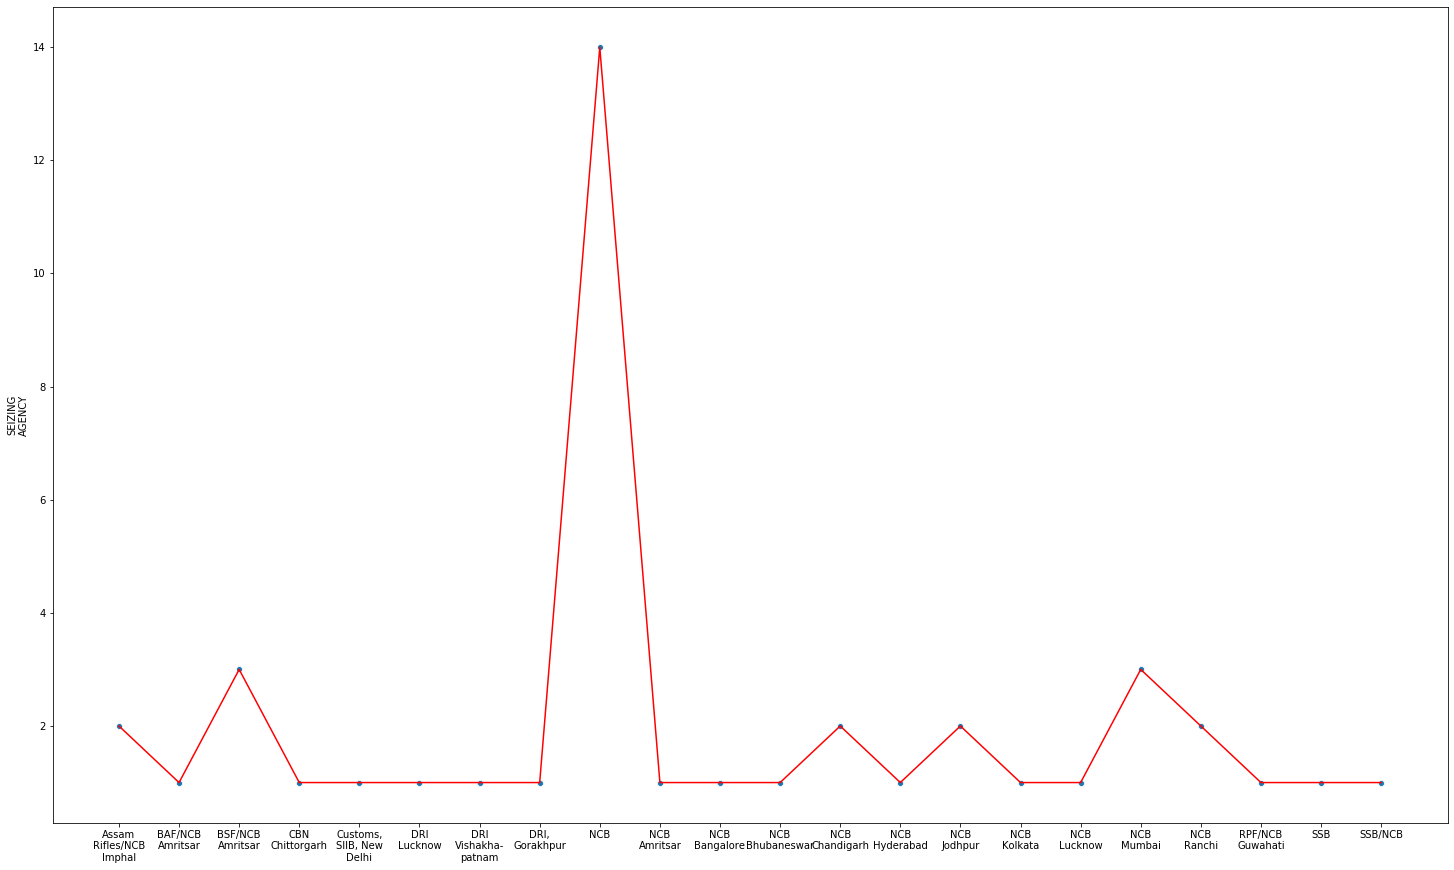

In [151]:
plt.figure(figsize=(25,15))
sns.lineplot(df2['SEIZING\nAGENCY'].value_counts().index, df2['SEIZING\nAGENCY'].value_counts(),c='red')
sns.scatterplot(df2['SEIZING\nAGENCY'].value_counts().index, df2['SEIZING\nAGENCY'].value_counts())

In [91]:
df2.columns

Index(['SL\nNo.', 'DATE OF\nSEIZURE', 'SEIZING\nAGENCY',
       'QUANTITY AND\nDRUG SEIZED\n(IN KGS.)', 'PLACE\nOF\nORIGIN',
       'INTENDED\nDESTINAT\nION', 'NAME OF\nPERSONS ARRESTED',
       'NATION-\nALITY', 'AGE', 'SEX', 'day', 'month'],
      dtype='object')

In [92]:
cols = ['SEIZING\nAGENCY','NATION-\nALITY','SEX','day','month']
df3 = df2[cols]

In [115]:
df3['SEX'].replace(to_replace=r'M.*$', value='M',regex=True, inplace=True)

C:\Users\jayan\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [118]:
df3['SEX'].replace(to_replace=r'M.*$', value='M',regex=True, inplace=True)

C:\Users\jayan\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [119]:
df3

,SEIZING AGENCY,NATION- ALITY,SEX,day,month
0,RPF/NCB\nGuwahati,Indian,M,2,1
1,NCB,-,-,2,2
2,BAF/NCB\nAmritsar,-,-,2,2
3,"Customs,\nSIIB, New\nDelhi",Somalian,M,2,2
4,NCB,-,-,2,4
5,BSF/NCB\nAmritsar,-,-,2,4
6,NCB\nBangalore,Indian,-,2,5
7,NCB\nAmritsar,Indian,M,2,5
8,BSF/NCB\nAmritsar,-,-,2,5
9,NCB\nChandigarh,Indian,M,2,5


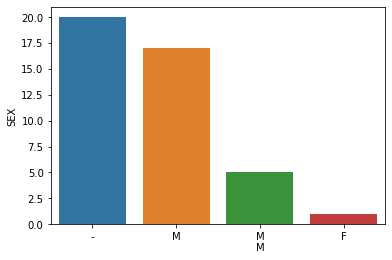

In [120]:
sns.barplot(df3['SEX'].value_counts().index, df3['SEX'].value_counts())

In [121]:
df4 = pd.get_dummies(df3, drop_first=True)

In [122]:
df4

,day,month,SEIZING AGENCY_BAF/NCB Amritsar,SEIZING AGENCY_BSF/NCB Amritsar,SEIZING AGENCY_CBN Chittorgarh,"SEIZING AGENCY_Customs, SIIB, New Delhi",SEIZING AGENCY_DRI Lucknow,SEIZING AGENCY_DRI Vishakha- patnam,"SEIZING AGENCY_DRI, Gorakhpur",SEIZING AGENCY_NCB,...,SEIZING AGENCY_RPF/NCB Guwahati,SEIZING AGENCY_SSB,SEIZING AGENCY_SSB/NCB,NATION- ALITY_Indian,NATION- ALITY_Indian Indian,NATION- ALITY_Nepalese,NATION- ALITY_Somalian,SEX_F,SEX_M,SEX_M M
0,2,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,2,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [123]:
reg = LinearRegression()

In [124]:
X = df4

In [125]:
X

,day,month,SEIZING AGENCY_BAF/NCB Amritsar,SEIZING AGENCY_BSF/NCB Amritsar,SEIZING AGENCY_CBN Chittorgarh,"SEIZING AGENCY_Customs, SIIB, New Delhi",SEIZING AGENCY_DRI Lucknow,SEIZING AGENCY_DRI Vishakha- patnam,"SEIZING AGENCY_DRI, Gorakhpur",SEIZING AGENCY_NCB,...,SEIZING AGENCY_RPF/NCB Guwahati,SEIZING AGENCY_SSB,SEIZING AGENCY_SSB/NCB,NATION- ALITY_Indian,NATION- ALITY_Indian Indian,NATION- ALITY_Nepalese,NATION- ALITY_Somalian,SEX_F,SEX_M,SEX_M M
0,2,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,2,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,2,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [132]:
corr = df4.corr()

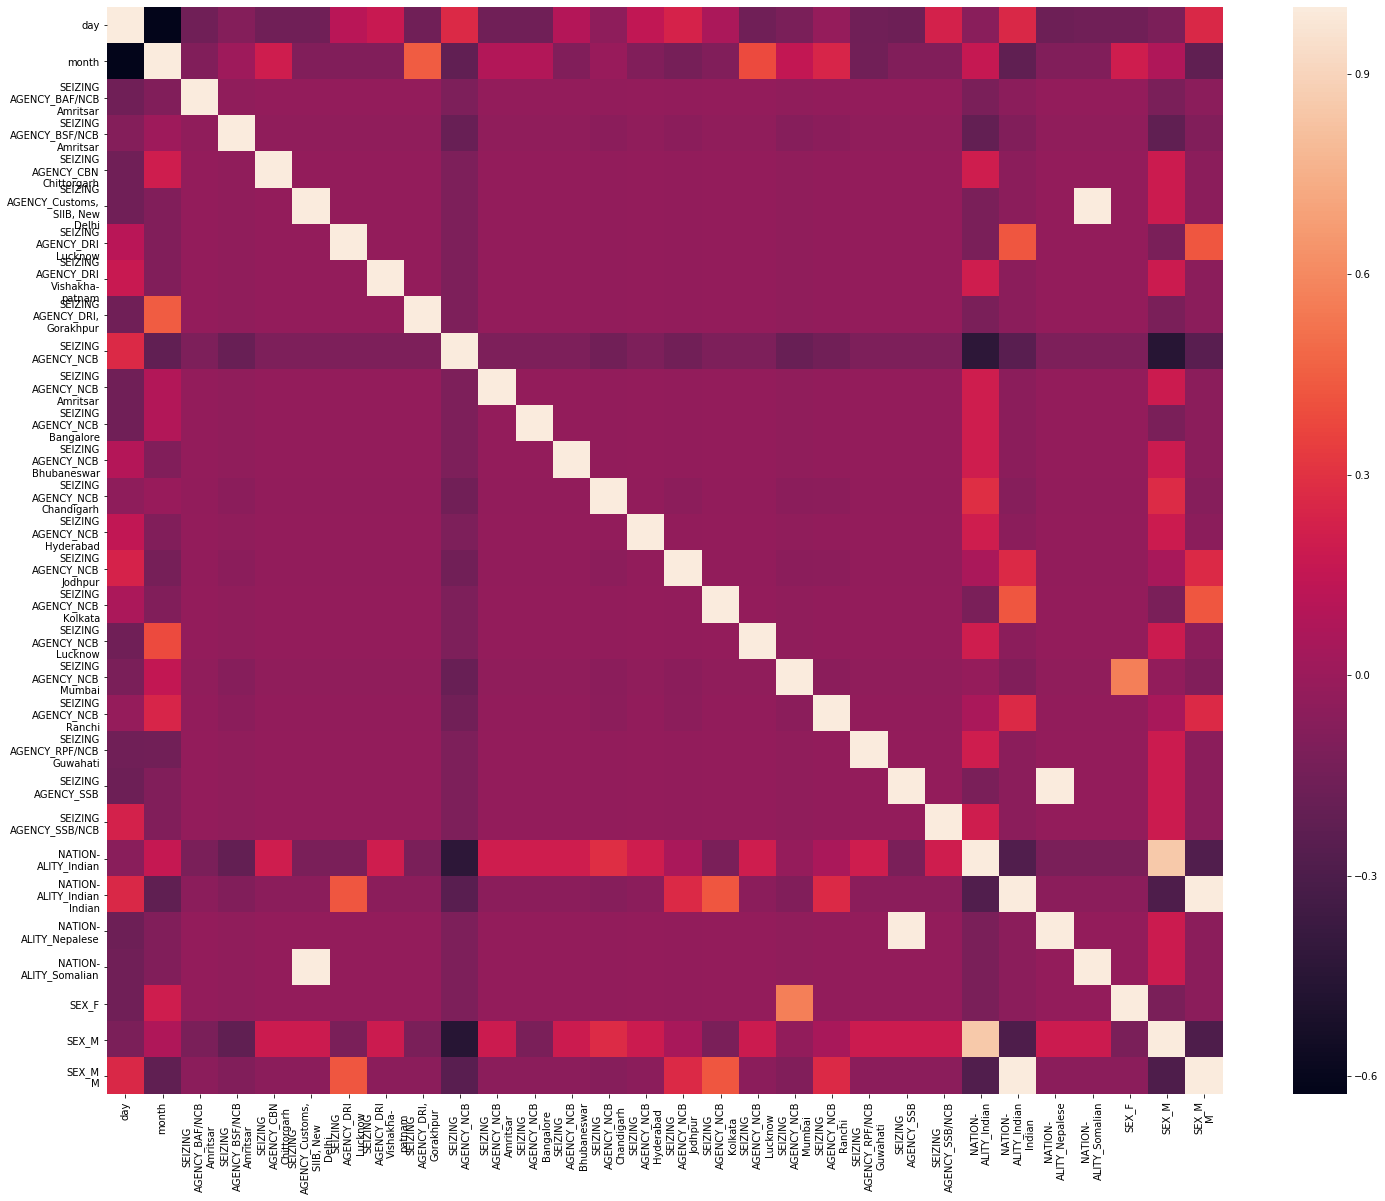

In [135]:
plt.figure(figsize=(25,20))
sns.heatmap(corr)

In [130]:
y = df2['AGE']

In [136]:
X_trian, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)

In [137]:
reg.fit(X_trian,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
y_pred= reg.predict(X_test)

In [146]:
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


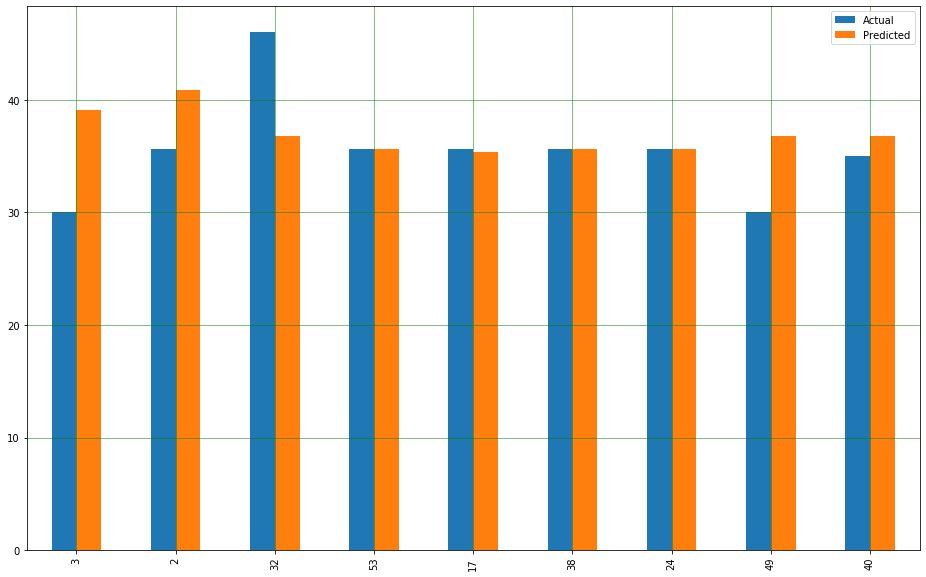

In [147]:
df_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.6146749621385763
Mean Squared Error: 27.190466332461774
Root Mean Squared Error: 5.21444784540624
